In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import math

## Medidas de Tendência Central

In [2]:
df = pd.read_csv('./dataset.csv')
Gdf = pd.read_csv('./dataGraph.csv')

### Média

In [3]:
print("Média dos preços:", df['Valor'].mean())

Média dos preços: 2152.8060941828253


In [4]:
print("Média dos anos de lançamento:", df['Ano'].mean())

Média dos anos de lançamento: 2018.014542936288


### Mediana

In [5]:
print("Mediana:", df['Valor'].median())

Mediana: 1850.0


## Medidas de Dispersão

### Desvio

In [6]:
media = df['Valor'].mean()
# Calculando o Desvio
d = df['Valor'].apply(lambda x: x - media)
d

0      -1952.806094
1      -1902.806094
2      -1852.806094
3      -1852.806094
4      -1852.806094
           ...     
1439    5246.193906
1440    5347.193906
1441    5347.193906
1442    5347.193906
1443    5347.193906
Name: Valor, Length: 1444, dtype: float64

### Média do Desvio Absoluto

In [7]:
acc = 0
for i in range(len(df)):
    acc += abs((df['Valor'].loc[i] - media))
acc = acc/len(df)
acc 

1053.6982527758296

### Variância

In [8]:
df['Valor'].var()

1878169.4703439889

### Desvio Padrão

In [9]:
df['Valor'].std()

1370.4632320292249

## Boxplot

<Axes: title={'center': 'Valor'}, xlabel='Modelo'>

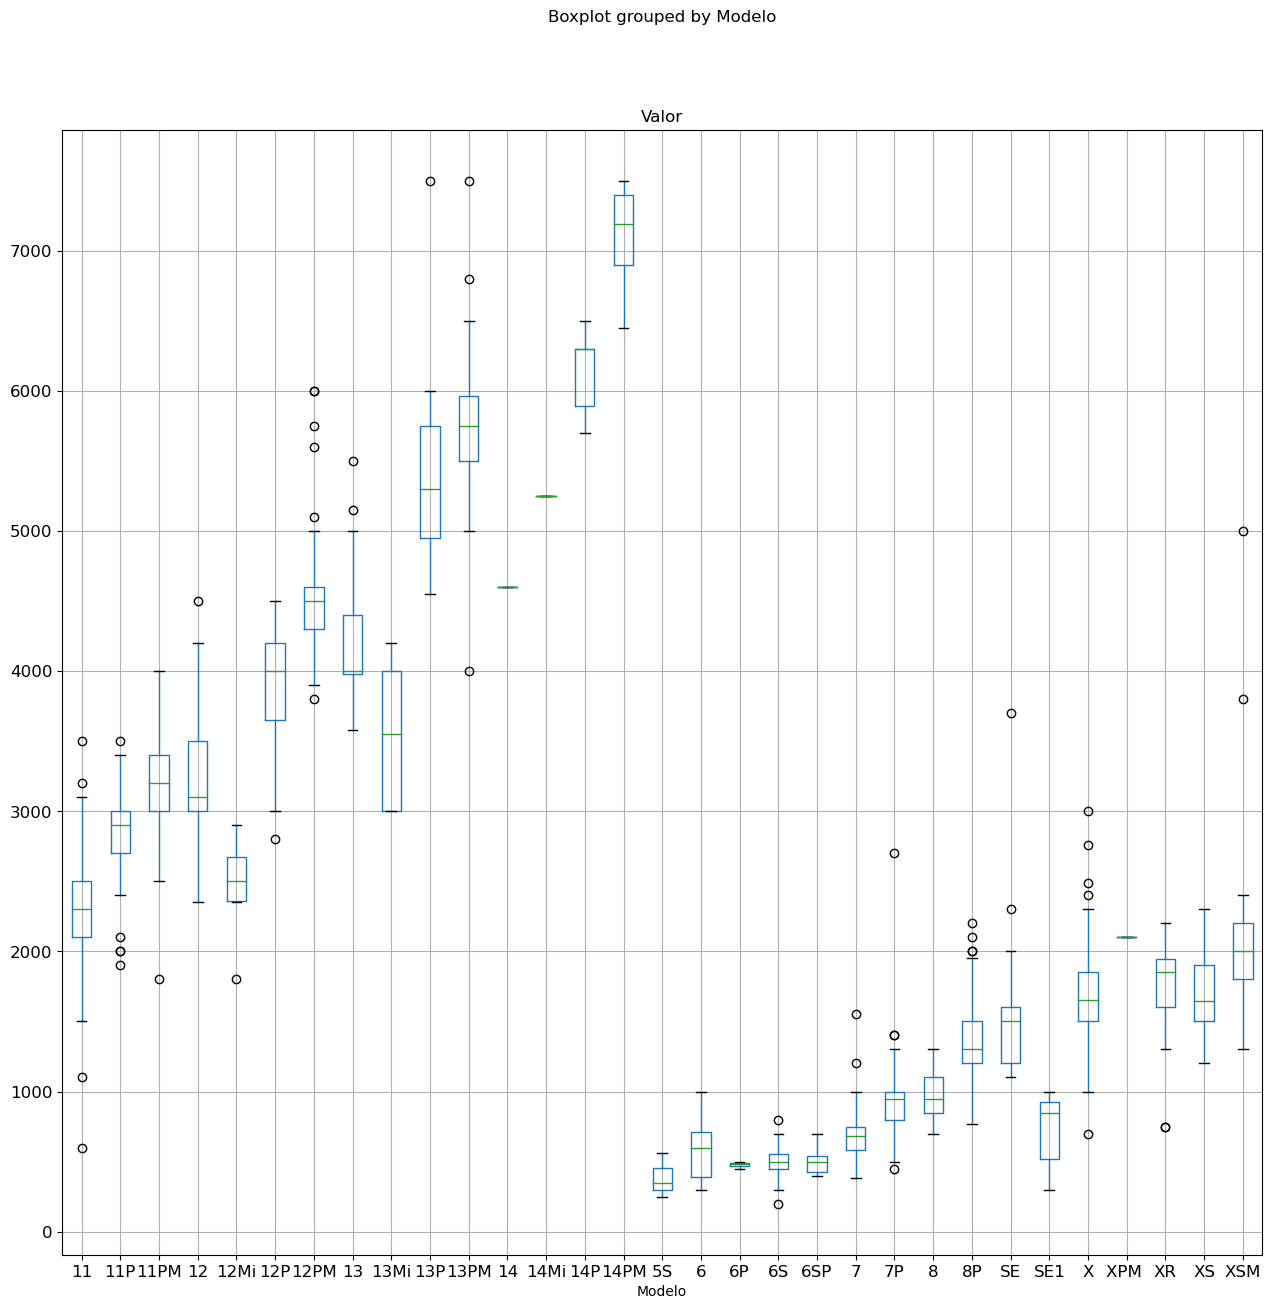

In [10]:
#Boxplot feito para cada modelo de aparelho
Gdf.boxplot(by='Modelo', column=['Valor'], fontsize='large', figsize=(15,15))

<Axes: >

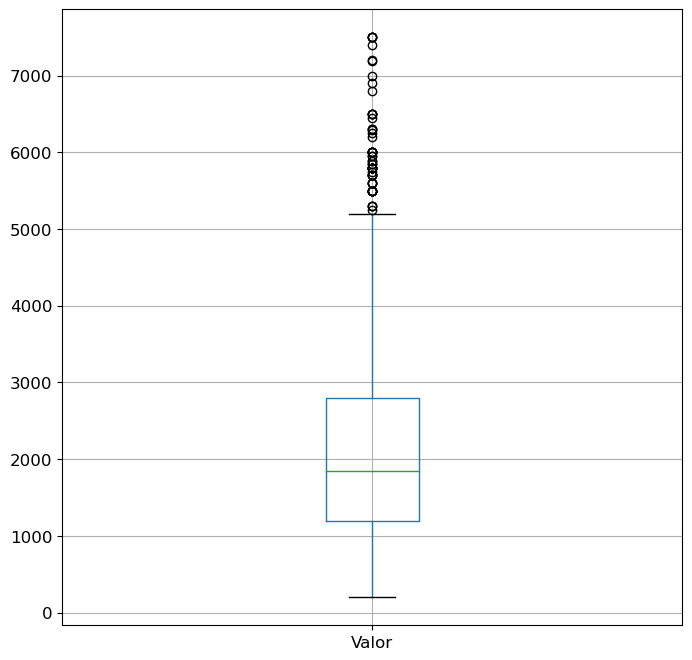

In [11]:
#Boxplot geral
Gdf.boxplot(column=['Valor'], fontsize='large', figsize=(8,8))

In [12]:
# Primeiro Quartil
Q1 = np.percentile(df['Valor'], 25,
                   interpolation = 'midpoint')

#Terceiro Quartil
Q3 = np.percentile(df['Valor'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
IQR

C:\Users\moura\AppData\Local\Temp\ipykernel_2948\4242128143.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['Valor'], 25,
C:\Users\moura\AppData\Local\Temp\ipykernel_2948\4242128143.py:6: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['Valor'], 75,


1600.0

In [13]:
#Limite superior
upper = Q3+1.5*IQR
upper

5200.0

In [14]:
#Limite inferior
lower = Q1-1.5*IQR
lower

-1200.0

In [15]:
#Acima do limite superior
outupper = df['Valor'] >= upper
outupper
print("Upper bound:\n",outupper)
print(np.where(outupper))
 
#Abaixo do limite superior
outlower = df['Valor'] <= lower
outlower
print("Lower bound:\n", outlower)
print(np.where(outlower))

Upper bound:
 0       False
1       False
2       False
3       False
4       False
        ...  
1439     True
1440     True
1441     True
1442     True
1443     True
Name: Valor, Length: 1444, dtype: bool
(array([1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390,
       1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401,
       1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412,
       1413, 1414, 1415, 1416, 1417, 1418, 1419, 1420, 1421, 1422, 1423,
       1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434,
       1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443], dtype=int64),)
Lower bound:
 0       False
1       False
2       False
3       False
4       False
        ...  
1439    False
1440    False
1441    False
1442    False
1443    False
Name: Valor, Length: 1444, dtype: bool
(array([], dtype=int64),)


## Z-Score

In [16]:
from scipy import stats
z = stats.zscore(df['Valor'])
print(z)

0      -1.425418
1      -1.388921
2      -1.352424
3      -1.352424
4      -1.352424
          ...   
1439    3.829370
1440    3.903094
1441    3.903094
1442    3.903094
1443    3.903094
Name: Valor, Length: 1444, dtype: float64


In [17]:
threshold = 3
 
# Position of the outlier
outlier = np.where(np.abs(z) > 3)
outlier

(array([1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436,
        1437, 1438, 1439, 1440, 1441, 1442, 1443], dtype=int64),)

In [18]:
df.drop('Modelo', axis=1, inplace=True)
df

,Valor,Local,Ano
0,200.0,AQUIRAZ,2015.0
1,250.0,FORTALEZA VILA UNIÃO,2013.0
2,300.0,FORTALEZA BENFICA,2015.0
3,300.0,FORTALEZA FÁTIMA,2016.0
4,300.0,FORTALEZA VICENTE PINZON,2014.0
...,...,...,...
1439,7399.0,FORTALEZA MEIRELES,2022.0
1440,7500.0,FORTALEZA PARQUE PRESIDENTE VARGAS,2021.0
1441,7500.0,FORTALEZA MANOEL SÁTIRO,2022.0
1442,7500.0,FORTALEZA MUCURIPE,2022.0


In [19]:
new_df = df[(df['Valor'] < upper) & (df['Valor'] > lower)]
new_df

,Valor,Local,Ano
0,200.0,AQUIRAZ,2015.0
1,250.0,FORTALEZA VILA UNIÃO,2013.0
2,300.0,FORTALEZA BENFICA,2015.0
3,300.0,FORTALEZA FÁTIMA,2016.0
4,300.0,FORTALEZA VICENTE PINZON,2014.0
...,...,...,...
1375,5150.0,PACATUBA SENADOR CARLOS JEREISSATI,2021.0
1376,5150.0,FORTALEZA PADRE ANDRADE,2021.0
1377,5150.0,FORTALEZA PASSARÉ,2021.0
1378,5199.0,FORTALEZA COCÓ,2021.0


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\moura\AppData\Local\Temp\ipykernel_2948\146625141.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Valor'])
C:\Users\moura\AppData\Local\Temp\ipykernel_2948\146625141.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['Valor'])


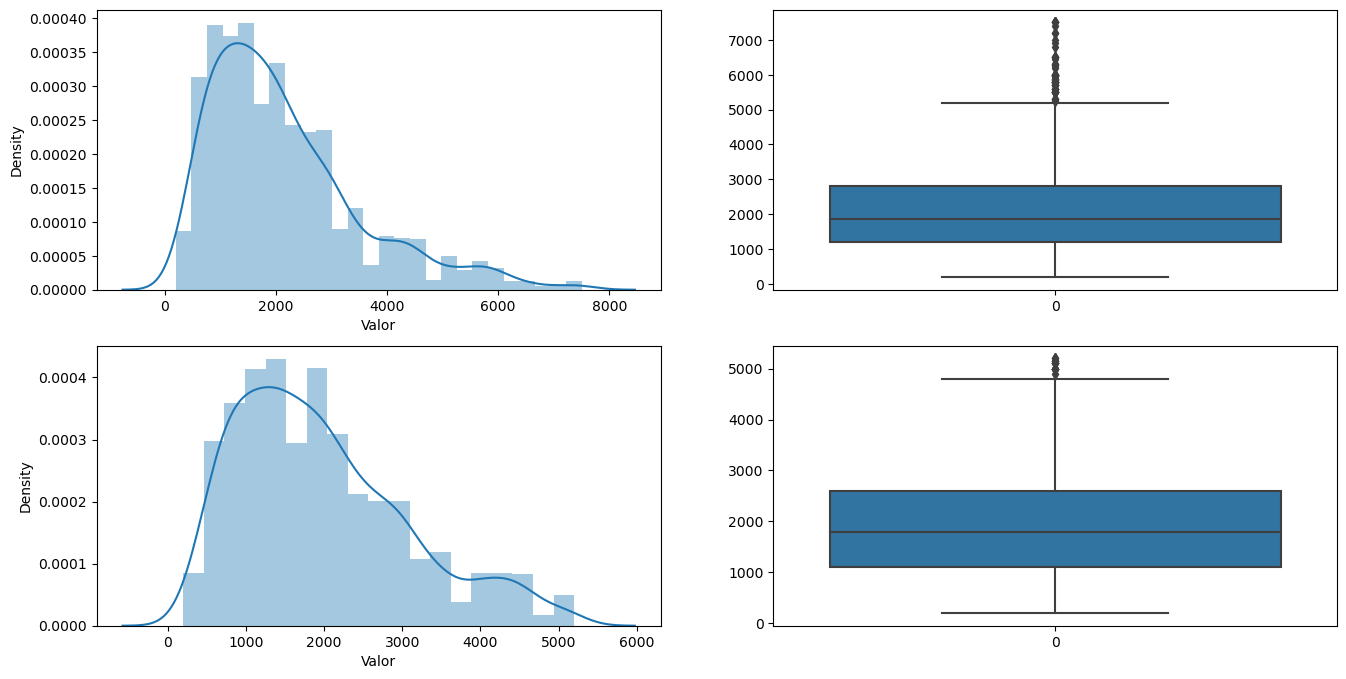

In [21]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Valor'])
plt.subplot(2,2,2)
sns.boxplot(df['Valor'])
plt.subplot(2,2,3)
sns.distplot(new_df['Valor'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Valor'])
plt.show()

# Isolation Forest

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### Testando a Regressão Linear Sem a Remoção de Outliers

In [23]:
df = pd.read_csv('./dataGraph.csv')
dfGraph = pd.read_csv('./dataGraph.csv')

In [24]:
#Função que transforma elementos não-numéricos em numéricos
dfGraph.fillna(0, inplace=True)

columns = df.columns.values
def handle_non_numerical_data(df):
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

dfGraph = handle_non_numerical_data(dfGraph)
print('----------Antes----------')
print(df.head())
print('\n----------Depois----------')
print(dfGraph.head())

----------Antes----------
  Modelo  Valor                     Local     Ano
0     6S  200.0                   AQUIRAZ  2015.0
1     5S  250.0      FORTALEZA VILA UNIÃO  2013.0
2     6S  300.0         FORTALEZA BENFICA  2015.0
3    SE1  300.0          FORTALEZA FÁTIMA  2016.0
4      6  300.0  FORTALEZA VICENTE PINZON  2014.0

----------Depois----------
   Modelo  Valor  Local     Ano
0      18  200.0    170  2015.0
1      15  250.0     75  2013.0
2      18  300.0     44  2015.0
3       0  300.0    162  2016.0
4      16  300.0    128  2014.0


In [25]:
#Recuperar Array
data = dfGraph.values
# Separar em elementos de input e output
X, y = data[:, 1:5], data[:, 0]
# Resume o shape do dataset
print('Shape X; Shape Y')
print(X.shape, y.shape)
print('\n')
# Separa em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# Resume o shape do treino e teste
print('Treino X; Teste X')
print(X_train.shape, X_test.shape)
print('\n')
print('Treino Y; Teste Y')
print(y_train.shape, y_test.shape)

Shape X; Shape Y
(1444, 3) (1444,)


Treino X; Teste X
(967, 3) (477, 3)


Treino Y; Teste Y
(967,) (477,)


In [26]:
dfGraph

,Modelo,Valor,Local,Ano
0,18,200.0,170,2015.0
1,15,250.0,75,2013.0
2,18,300.0,44,2015.0
3,0,300.0,162,2016.0
4,16,300.0,128,2014.0
...,...,...,...,...
1439,9,7399.0,124,2022.0
1440,24,7500.0,180,2021.0
1441,9,7500.0,167,2022.0
1442,9,7500.0,59,2022.0


In [27]:
y

array([18., 15., 18., ...,  9.,  9.,  4.])

In [28]:
X

array([[ 200.,  170., 2015.],
       [ 250.,   75., 2013.],
       [ 300.,   44., 2015.],
       ...,
       [7500.,  167., 2022.],
       [7500.,   59., 2022.],
       [7500.,  110., 2021.]])

In [29]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# Avalia o modelo
yhat = model.predict(X_test)
# Avalia previsões
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 6.348


### Detectando Outliers com o Método Isolation Forest

In [30]:
dfGraph = handle_non_numerical_data(dfGraph)
# Identifica outliers no dataset treino
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

In [31]:
model=IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1.0)
model.fit(X_train,y_train)

IsolationForest(contamination=0.1, n_estimators=50)

In [32]:
dfGraph = dfGraph.iloc[:,0:4]
dfGraph

,Modelo,Valor,Local,Ano
0,18,200.0,170,2015.0
1,15,250.0,75,2013.0
2,18,300.0,44,2015.0
3,0,300.0,162,2016.0
4,16,300.0,128,2014.0
...,...,...,...,...
1439,9,7399.0,124,2022.0
1440,24,7500.0,180,2021.0
1441,9,7500.0,167,2022.0
1442,9,7500.0,59,2022.0


In [33]:
dfGraph['scores']=model.decision_function(dfGraph.iloc[:,1:4])

E:\Documents\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


In [34]:
dfGraph

,Modelo,Valor,Local,Ano,scores
0,18,200.0,170,2015.0,-0.010111
1,15,250.0,75,2013.0,-0.096218
2,18,300.0,44,2015.0,-0.031843
3,0,300.0,162,2016.0,0.024858
4,16,300.0,128,2014.0,-0.042963
...,...,...,...,...,...
1439,9,7399.0,124,2022.0,-0.125911
1440,24,7500.0,180,2021.0,-0.116643
1441,9,7500.0,167,2022.0,-0.137302
1442,9,7500.0,59,2022.0,-0.144263


In [35]:
X = dfGraph.iloc[:,1:4]
X

,Valor,Local,Ano
0,200.0,170,2015.0
1,250.0,75,2013.0
2,300.0,44,2015.0
3,300.0,162,2016.0
4,300.0,128,2014.0
...,...,...,...
1439,7399.0,124,2022.0
1440,7500.0,180,2021.0
1441,7500.0,167,2022.0
1442,7500.0,59,2022.0


In [36]:
y = dfGraph.iloc[:,0]
y

0       18
1       15
2       18
3        0
4       16
        ..
1439     9
1440    24
1441     9
1442     9
1443     4
Name: Modelo, Length: 1444, dtype: int64

In [37]:
dfGraph['anomaly']=model.predict(X)

E:\Documents\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


In [38]:
anomaly=dfGraph.loc[dfGraph['anomaly']==-1]
anomaly_index=list(anomaly.index)

In [39]:
anomaly

,Modelo,Valor,Local,Ano,scores,anomaly
0,18,200.0,170,2015.0,-0.010111,-1
1,15,250.0,75,2013.0,-0.096218,-1
2,18,300.0,44,2015.0,-0.031843,-1
4,16,300.0,128,2014.0,-0.042963,-1
5,15,350.0,151,2013.0,-0.082269,-1
...,...,...,...,...,...,...
1439,9,7399.0,124,2022.0,-0.125911,-1
1440,24,7500.0,180,2021.0,-0.116643,-1
1441,9,7500.0,167,2022.0,-0.137302,-1
1442,9,7500.0,59,2022.0,-0.144263,-1


### Removendo os Outliers

In [40]:
#X = X.reshape(-1, X.shape[-1])
# select all rows that are not outliers

mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]

In [41]:
X_train.shape

(872, 3)

In [42]:
y_train.shape

(872,)

In [43]:
dfGraph = pd.read_csv('./dataGraph.csv')
dfGraph = handle_non_numerical_data(dfGraph)
dfGraph

,Modelo,Valor,Local,Ano
0,18,200.0,170,2015.0
1,15,250.0,75,2013.0
2,18,300.0,44,2015.0
3,0,300.0,162,2016.0
4,16,300.0,128,2014.0
...,...,...,...,...
1439,9,7399.0,124,2022.0
1440,24,7500.0,180,2021.0
1441,9,7500.0,167,2022.0
1442,9,7500.0,59,2022.0


In [44]:
# evaluate model performance with outliers removed using isolation forest
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error
# retrieve the array
data = dfGraph.values
# split into input and output elements
X, y = data[:, 1:5], data[:, 0]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(967, 3) (967,)
(870, 3) (870,)
MAE: 6.251


### Minimum Covariance Determinant (MCD)

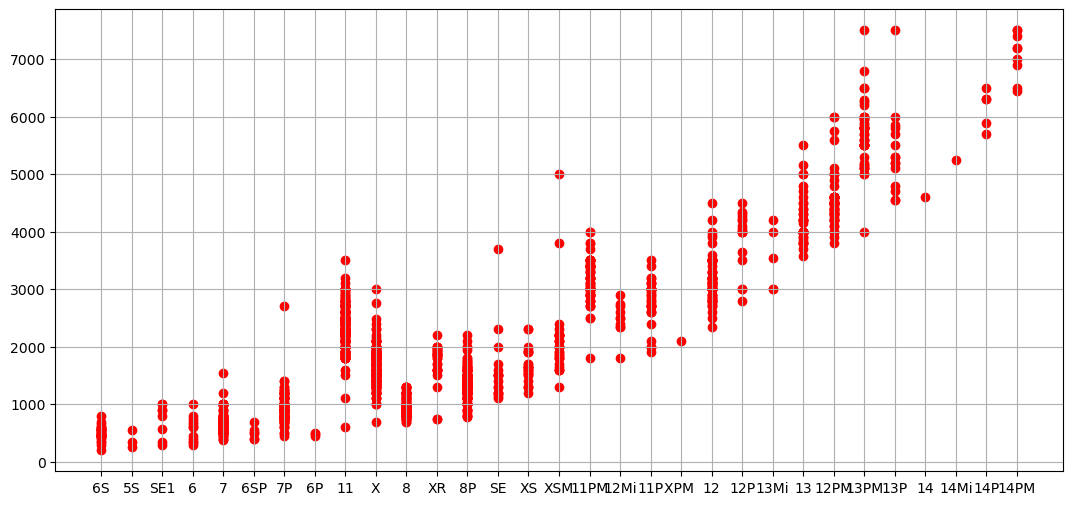

In [45]:
df = pd.read_csv('./dataGraph.csv')
# show data in a scatterplot
plt.figure(figsize=(13,6))
plt.scatter(df["Modelo"], df["Valor"], color = "r")
plt.grid()

In [46]:
# convert dataframe to arrays
dfGraph = handle_non_numerical_data(dfGraph)
data = dfGraph[['Modelo', 'Valor']].values

In [47]:
from sklearn.covariance import EllipticEnvelope
# instantiate model
model1 = EllipticEnvelope(contamination = 0.1) 
# fit model
model1.fit(data)

EllipticEnvelope()

In [48]:
# new data for prediction (data needs to be in arrays)
new_data = np.array([[10,10], [1,1], [1,1], [1,1]])
# predict on new data 
pred1 = model1.predict(new_data)
print(pred1)

[ 1 -1 -1 -1]


### Testando a Regressão Linear Após a Remoção de Outliers Usando Minimum Covariance Determinant (MCD)

In [49]:
# retrieve the array
data = dfGraph.values
# split into input and output elements
X, y = data[:, 1:5], data[:, 0]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)

(967, 3) (967,)


In [50]:
# identify outliers in the training dataset
from sklearn.covariance import EllipticEnvelope
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X_train)

In [51]:
y_train

array([28., 17., 28.,  6., 21., 20., 22., 22., 10., 20., 28.,  6.,  6.,
       17., 22., 29., 22., 28.,  6., 17.,  5., 21., 12.,  4., 12., 17.,
       21., 11., 18., 24.,  3., 30.,  4., 30., 28., 29., 22., 17., 22.,
       25.,  5., 22., 17., 17., 26., 17., 11., 12., 16., 17., 30., 11.,
       11., 11., 17., 28.,  2.,  2., 20., 22.,  5., 25.,  7.,  6., 28.,
       22.,  6., 28.,  2.,  6., 20.,  5.,  5.,  5., 22., 29., 17.,  5.,
        6.,  5.,  5., 20.,  5., 22., 24., 30., 30., 11., 11.,  6., 22.,
       11., 28., 11., 22., 22.,  5., 22., 28., 17., 28., 17., 14., 22.,
       29., 22., 29., 17., 14.,  4.,  6., 12.,  6., 19., 29., 22., 29.,
       20., 20.,  9., 11., 11., 17., 11.,  5., 28., 17., 12., 24., 11.,
       17., 28., 17., 29., 17., 17., 18.,  6., 11., 18., 30.,  2., 29.,
       22., 11., 17., 17.,  2., 22., 20.,  6., 11., 15.,  4., 12., 11.,
       12., 29., 22.,  6., 20., 11., 22., 17., 17., 25., 12., 24., 20.,
       11., 28., 20.,  3., 11., 20., 29., 28., 11., 20., 11., 24

In [52]:
# evaluate model performance with outliers removed using elliptical envelope
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import mean_absolute_error
# retrieve the array
data = dfGraph.values
# split into input and output elements
X, y = data[:, 1:5], data[:, 0]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)


(967, 3) (967,)
(957, 3) (957,)
MAE: 6.332


### Local Outlier Factor (LOF)

In [53]:
# data visualzation
import matplotlib.pyplot as plt
import seaborn as sns
# outlier/anomaly detection
from sklearn.neighbors import LocalOutlierFactor

In [54]:
df = pd.read_csv('./dataGraph.csv')
df

,Modelo,Valor,Local,Ano
0,6S,200.0,AQUIRAZ,2015.0
1,5S,250.0,FORTALEZA VILA UNIÃO,2013.0
2,6S,300.0,FORTALEZA BENFICA,2015.0
3,SE1,300.0,FORTALEZA FÁTIMA,2016.0
4,6,300.0,FORTALEZA VICENTE PINZON,2014.0
...,...,...,...,...
1439,14PM,7399.0,FORTALEZA MEIRELES,2022.0
1440,13PM,7500.0,FORTALEZA PARQUE PRESIDENTE VARGAS,2021.0
1441,14PM,7500.0,FORTALEZA MANOEL SÁTIRO,2022.0
1442,14PM,7500.0,FORTALEZA MUCURIPE,2022.0


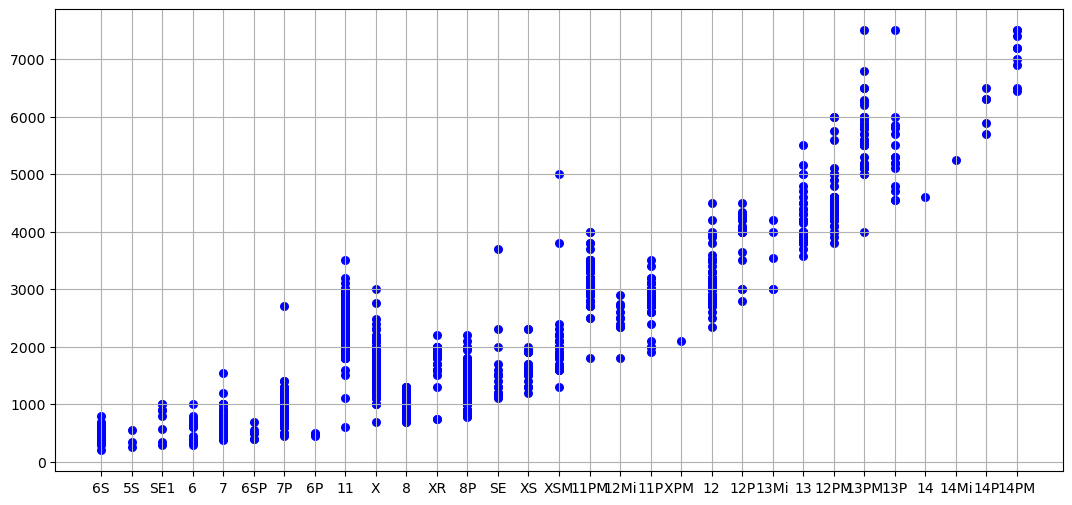

In [55]:
# plot data points
plt.figure(figsize=(13,6))
plt.scatter(df["Modelo"], df["Valor"], color = "b", s = 30)
plt.grid()

In [56]:
dfGraph = handle_non_numerical_data(dfGraph)
# model specification
model1 = LocalOutlierFactor(n_neighbors = 2, metric = "manhattan", contamination = 0.02)
# model fitting
y_pred = model1.fit_predict(dfGraph)

In [57]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [58]:
# filter outlier index
#outlier_index = where(y_pred == -1) # negative values are outliers and positives inliers
# filter outlier values
outlier_index = 4

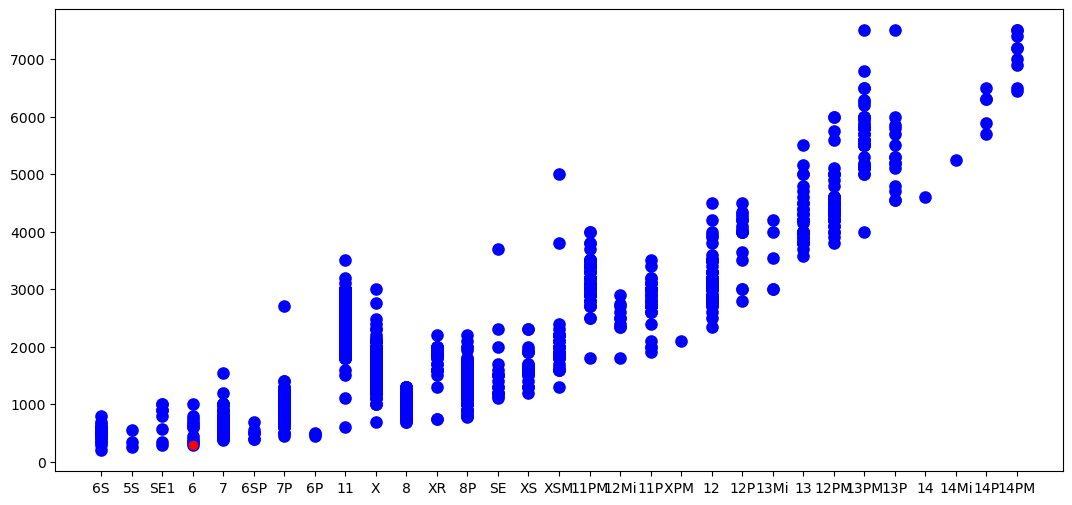

In [59]:
df = pd.read_csv('./dataGraph.csv')
outlier_values = df.iloc[outlier_index]
# plot data
plt.figure(figsize=(13,6))
plt.scatter(df["Modelo"], df["Valor"], color = "b", s = 65)
# plot outlier values
plt.scatter(outlier_values["Modelo"], outlier_values["Valor"], color = "r")

### Testando a Regressão Linear Após a Remoção de Outliers Usando Local Outlier Factor (LOF)

In [60]:
#convertando valores nao-numericos para numericos
dfGraph = handle_non_numerical_data(dfGraph)
# retrieve the array
data = dfGraph.values
# split into input and output elements
X, y = data[:, 1:5], data[:, 0]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)

(967, 3) (967,)


In [61]:
dfGraph

,Modelo,Valor,Local,Ano
0,18,200.0,170,2015.0
1,15,250.0,75,2013.0
2,18,300.0,44,2015.0
3,0,300.0,162,2016.0
4,16,300.0,128,2014.0
...,...,...,...,...
1439,9,7399.0,124,2022.0
1440,24,7500.0,180,2021.0
1441,9,7500.0,167,2022.0
1442,9,7500.0,59,2022.0


In [62]:
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [63]:
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(956, 3) (956,)
MAE: 6.319


## One-Class SVM

### Testando a Regressão Linear Após a Remoção de Outliers Usando Local Outlier Factor (LOF)

In [64]:
from sklearn.svm import OneClassSVM

In [65]:
# identify outliers in the training dataset
ee = OneClassSVM(nu=0.01)
yhat = ee.fit_predict(X_train)

In [66]:
# evaluate model performance with outliers removed using one class SVM
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_absolute_error
# retrieve the array
data = dfGraph.values
# split into input and output elements
X, y = data[:, 1:5], data[:, 0]
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the training dataset
print(X_train.shape, y_train.shape)
# identify outliers in the training dataset
ee = OneClassSVM(nu=0.01)
yhat = ee.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print(X_train.shape, y_train.shape)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

(967, 3) (967,)
(957, 3) (957,)
MAE: 6.335
